<a href="https://colab.research.google.com/github/Abhi-008-sh/MLGLab/blob/main/1BM22CS008_LabTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Evaluation Metrics:
Accuracy: 0.7922
Precision: 0.7200
Recall: 0.6667
F1-Score: 0.6923
ROC-AUC: 0.8284


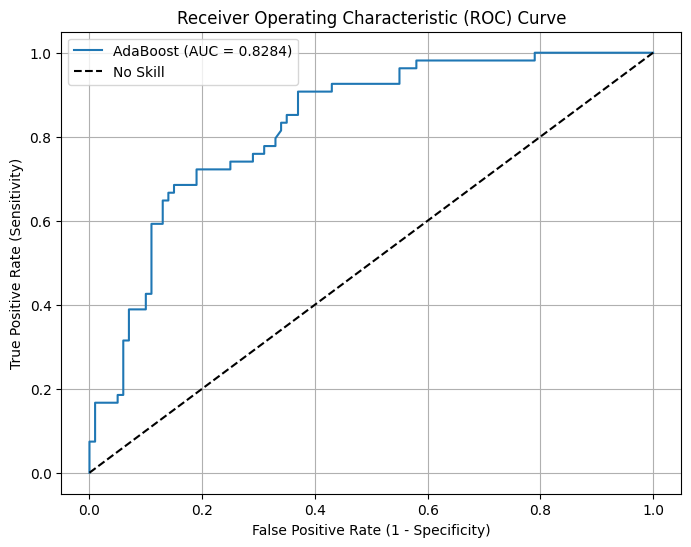

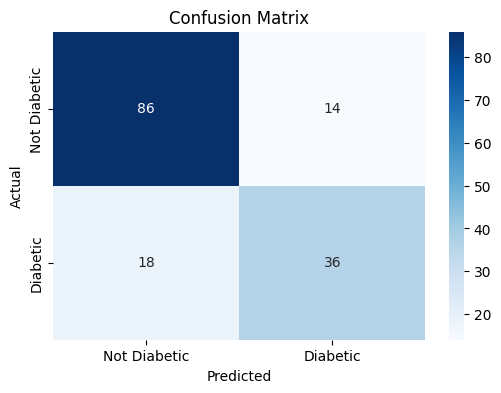

In [2]:
!pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


try:
    df = pd.read_csv('/content/diabetes (4).csv')
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please upload the dataset.")
    exit()

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
y_pred_proba = ada_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


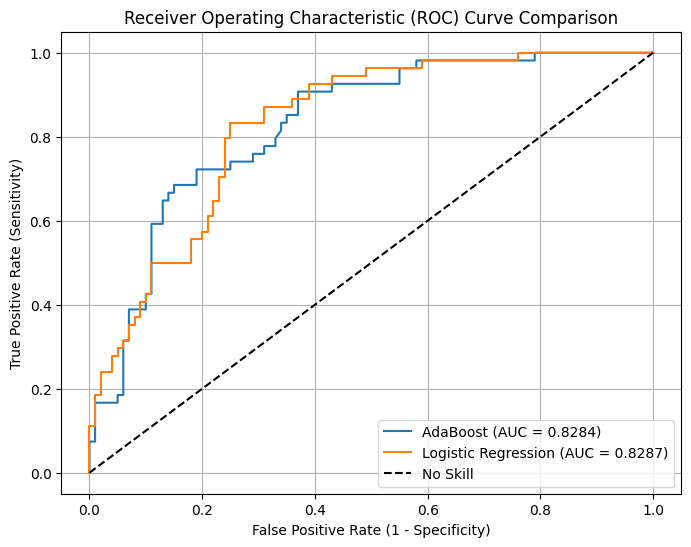


Logistic Regression Evaluation Metric:
ROC-AUC: 0.8287


In [6]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predict probabilities for Logistic Regression
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC for Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

# Get ROC curve points for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.4f})')
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print ROC-AUC for Logistic Regression
print("\nLogistic Regression Evaluation Metric:")
print(f"ROC-AUC: {roc_auc_log_reg:.4f}")


Accuracy: 0.7273
Precision: 0.6429
Recall: 0.5000
F1-Score: 0.5625


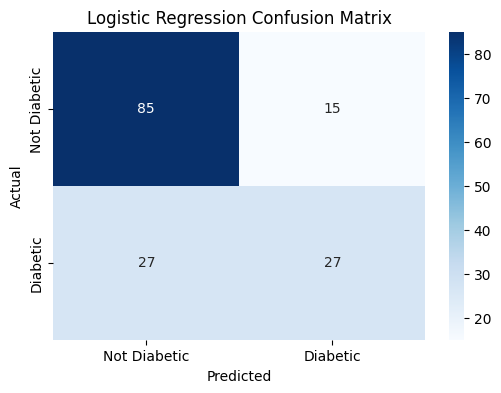


Comparison of Model Performance:
Metric     | AdaBoost | SVM    | Logistic Regression
-----------|----------|--------|--------------------
Accuracy   | 0.7922 | 0.7208 | 0.7273
Precision  | 0.7200 | 0.6571 | 0.6429
Recall     | 0.6667 | 0.4259 | 0.5000
F1-Score   | 0.6923 | 0.5169 | 0.5625
ROC-AUC    | 0.8284 | 0.7841 | 0.8287


In [7]:
import matplotlib.pyplot as plt
# Predict for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Calculate additional metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print additional metrics for Logistic Regression
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

# Plot Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("\nComparison of Model Performance:")
print("Metric     | AdaBoost | SVM    | Logistic Regression")
print("-----------|----------|--------|--------------------")
print(f"Accuracy   | {accuracy:.4f} | {accuracy_svm:.4f} | {accuracy_log_reg:.4f}")
print(f"Precision  | {precision:.4f} | {precision_svm:.4f} | {precision_log_reg:.4f}")
print(f"Recall     | {recall:.4f} | {recall_svm:.4f} | {recall_log_reg:.4f}")
print(f"F1-Score   | {f1:.4f} | {f1_svm:.4f} | {f1_log_reg:.4f}")
print(f"ROC-AUC    | {roc_auc:.4f} | {roc_auc_svm:.4f} | {roc_auc_log_reg:.4f}")



SVM Model Evaluation Metrics:
Accuracy: 0.7208
Precision: 0.6571
Recall: 0.4259
F1-Score: 0.5169
ROC-AUC: 0.7841


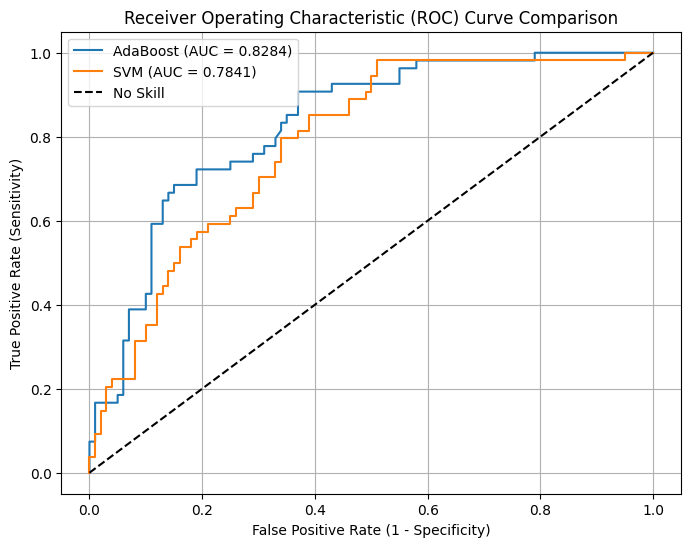

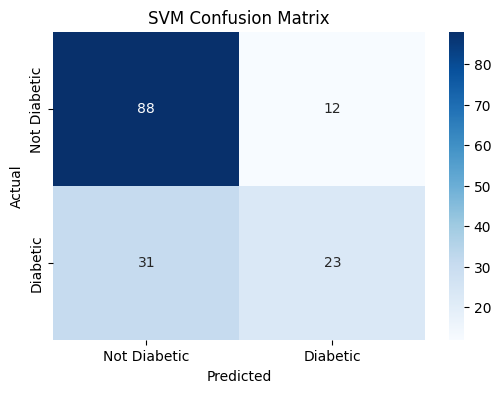


Comparison of Model Performance:
Metric     | AdaBoost | SVM
-----------|----------|------
Accuracy   | 0.7922 | 0.7208
Precision  | 0.7200 | 0.6571
Recall     | 0.6667 | 0.4259
F1-Score   | 0.6923 | 0.5169
ROC-AUC    | 0.8284 | 0.7841


In [8]:
# p

import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC(probability=True, random_state=42) # probability=True is needed for predict_proba

svm_clf.fit(X_train, y_train)

# Predict with SVM
y_pred_svm = svm_clf.predict(X_test)
y_pred_proba_svm = svm_clf.predict_proba(X_test)[:, 1]

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print("\nSVM Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")

# Plot ROC curve for both models
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

print("\nComparison of Model Performance:")
print("Metric     | AdaBoost | SVM")
print("-----------|----------|------")
print(f"Accuracy   | {accuracy:.4f} | {accuracy_svm:.4f}")
print(f"Precision  | {precision:.4f} | {precision_svm:.4f}")
print(f"Recall     | {recall:.4f} | {recall_svm:.4f}")
print(f"F1-Score   | {f1:.4f} | {f1_svm:.4f}")
print(f"ROC-AUC    | {roc_auc:.4f} | {roc_auc_svm:.4f}")
